MNIST Handwriting Recogniton MLP Practice
===
Kenny Hsieh, 2018/3/14

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist

np.random.seed(10)

Using TensorFlow backend.


## Load & Observe the MNIST dataset

In [3]:
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print('train data =', len(X_train_image))
print('test data =', len(X_test_image))

train data = 60000
test data = 10000


In [5]:
print('X_train_image =', X_train_image.shape)
print('X_test_label =', y_train_label.shape)

X_train_image = (60000, 28, 28)
X_test_label = (60000,)


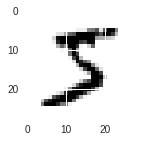

In [6]:
import matplotlib.pyplot as plt

def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap = 'binary')
  plt.show()

plot_image(X_train_image[0])

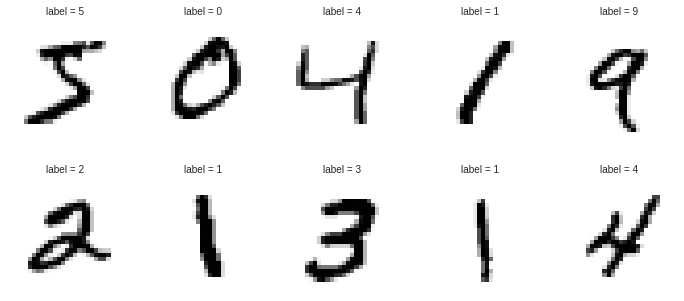

In [7]:
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  
  #Plot at most 25 figure
  if num > 25 : num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(images[idx], cmap = 'binary')
    title = "label = " + str(labels[idx])
    if len(prediction) > 0:
      title += ',predict=' + str(prediction[idx])
     
    ax.set_title(title, fontsize = 10)
    ax.set_xticks([]); ax.set_yticks([])
    idx += 1
  plt.show()

plot_images_labels_prediction(X_train_image, y_train_label, [], 0, 10)

##Images Preprocessing : Reshape & Normalization

In [8]:
X_Train = X_train_image.reshape(60000, 784).astype('float32')
X_Test = X_test_image.reshape(10000, 784).astype('float32')

print('X Train Reshape : ', X_Train.shape)
print('X Test Reshape : ', X_Test.shape)
#print(X_Train[0])

X Train Reshape :  (60000, 784)
X Test Reshape :  (10000, 784)


In [0]:
X_Train_normalize = X_Train / 255
X_Test_normalize = X_Test / 255

#print(X_Train_normalize[0])

## Label Preprocessing : One Hot Encoding

In [10]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

print(y_Train_OneHot[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Construct the Multilayer Percetron (MLP)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = 256, #Number of hidden layer
                input_dim = 784,
                kernel_initializer = 'normal', #Inital the weight with normal distribution
                activation = 'relu'))
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


## Training the MLP

In [20]:
# Define the Loss, Evaluation Function, and Optimizer
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['accuracy'])

# Fitting the model
train_history = model.fit(x = X_Train_normalize,
                         y = y_Train_OneHot,
                         validation_split = 0.2,
                         epochs = 10,
                         batch_size = 200,
                         verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.1223 - val_acc: 0.9778
Epoch 2/10
 - 1s - loss: 5.9744e-04 - acc: 0.9999 - val_loss: 0.1114 - val_acc: 0.9790
Epoch 3/10
 - 1s - loss: 1.2298e-04 - acc: 1.0000 - val_loss: 0.1085 - val_acc: 0.9797
Epoch 4/10
 - 1s - loss: 7.8459e-05 - acc: 1.0000 - val_loss: 0.1091 - val_acc: 0.9801
Epoch 5/10
 - 1s - loss: 6.7100e-05 - acc: 1.0000 - val_loss: 0.1094 - val_acc: 0.9800
Epoch 6/10
 - 1s - loss: 5.9755e-05 - acc: 1.0000 - val_loss: 0.1101 - val_acc: 0.9799
Epoch 7/10
 - 1s - loss: 5.3878e-05 - acc: 1.0000 - val_loss: 0.1107 - val_acc: 0.9802
Epoch 8/10
 - 1s - loss: 4.9149e-05 - acc: 1.0000 - val_loss: 0.1111 - val_acc: 0.9797
Epoch 9/10
 - 1s - loss: 4.5372e-05 - acc: 1.0000 - val_loss: 0.1116 - val_acc: 0.9799
Epoch 10/10
 - 1s - loss: 4.1969e-05 - acc: 1.0000 - val_loss: 0.1120 - val_acc: 0.9800


## Observe the training history

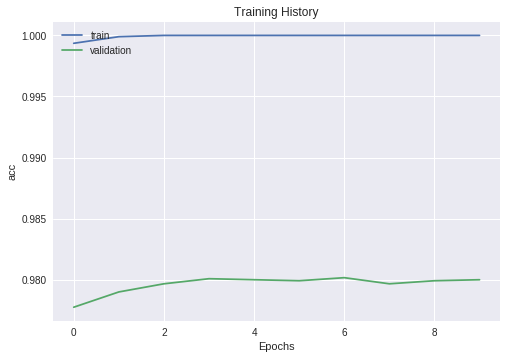

In [21]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Training History')
  plt.ylabel(train)
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = 'upper left')
  plt.show()

show_train_history(train_history, 'acc', 'val_acc')

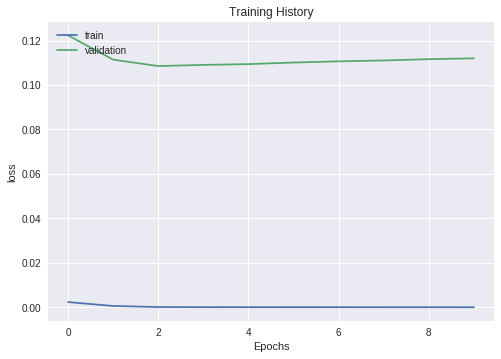

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

## Testing the Model Performance

In [26]:
scores = model.evaluate(X_Test_normalize, y_Test_OneHot)
print('Accuracy : ', scores[1])

10000/10000 [==============================] - 1s 52us/step
Accuracy :  0.9806


## Predict with Model

In [28]:
prediction = model.predict_classes(X_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6])

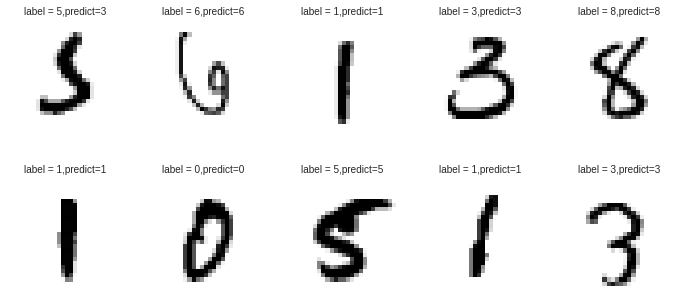

In [31]:
plot_images_labels_prediction(X_test_image, y_test_label, prediction, 340)

## Confusion Matrix

In [32]:
pd.crosstab(y_test_label, prediction,
           rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,0,1,0,3,1,3,0
1,0,1126,3,1,0,1,2,1,1,0
2,4,0,1015,2,0,0,2,4,4,1
3,0,0,2,994,0,3,0,3,4,4
4,2,0,4,1,959,0,3,2,1,10
5,2,0,0,13,1,865,2,1,6,2
6,5,3,2,1,3,3,941,0,0,0
7,0,2,9,2,0,0,0,1011,2,2
8,1,1,4,8,1,2,2,5,948,2


## Result Dataframe

In [37]:
result = pd.DataFrame({'label' : y_test_label, 'prediction' : prediction})
result.head()

,label,prediction
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [39]:
result[(result.label == 5) & (result.prediction == 3)]

,label,prediction
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
3117,5,3
3902,5,3
4271,5,3
4360,5,3


## Improve the Model with Dropout to Avoid Overfitting

In [46]:
from keras.layers import Dropout

model_drop = Sequential()
model_drop.add(Dense(units = 1000,
                     input_dim = 784,
                     kernel_initializer = 'normal',
                     activation = 'relu'))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(units = 10,
                     kernel_initializer = 'normal',
                     activation = 'softmax'))

print(model_drop.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
model_drop.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['accuracy'])

train_history = model_drop.fit(x = X_Train_normalize,
                              y = y_Train_OneHot,
                              validation_split = 0.2,
                              epochs = 10,
                              batch_size = 200,
                              verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.3624 - acc: 0.8913 - val_loss: 0.1628 - val_acc: 0.9543
Epoch 2/10
 - 2s - loss: 0.1613 - acc: 0.9541 - val_loss: 0.1172 - val_acc: 0.9655
Epoch 3/10
 - 2s - loss: 0.1160 - acc: 0.9651 - val_loss: 0.0963 - val_acc: 0.9717
Epoch 4/10
 - 2s - loss: 0.0910 - acc: 0.9727 - val_loss: 0.0851 - val_acc: 0.9732
Epoch 5/10
 - 2s - loss: 0.0748 - acc: 0.9774 - val_loss: 0.0859 - val_acc: 0.9752
Epoch 6/10
 - 2s - loss: 0.0640 - acc: 0.9806 - val_loss: 0.0764 - val_acc: 0.9759
Epoch 7/10
 - 2s - loss: 0.0544 - acc: 0.9831 - val_loss: 0.0705 - val_acc: 0.9791
Epoch 8/10
 - 2s - loss: 0.0479 - acc: 0.9850 - val_loss: 0.0699 - val_acc: 0.9802
Epoch 9/10
 - 2s - loss: 0.0416 - acc: 0.9873 - val_loss: 0.0653 - val_acc: 0.9799
Epoch 10/10
 - 2s - loss: 0.0358 - acc: 0.9893 - val_loss: 0.0646 - val_acc: 0.9800


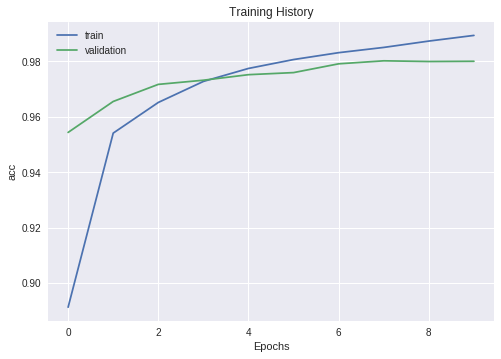

In [48]:
show_train_history(train_history, 'acc', 'val_acc')

In [51]:
scores = model_drop.evaluate(X_Test_normalize, y_Test_OneHot)
print('Accuracy : ', scores[1])

10000/10000 [==============================] - 1s 58us/step
Accuracy :  0.9829


## Improving the Model with More Hidden Layer

In [52]:
#Hidden Layer 1
model_more = Sequential()
model_more.add(Dense(units = 1000,
                     input_dim = 784,
                     kernel_initializer = 'normal',
                     activation = 'relu'))
model_more.add(Dropout(0.5))

#Hidden Layer 2
model_more.add(Dense(units = 1000,
                     kernel_initializer = 'normal',
                     activation = 'relu'))
model_more.add(Dropout(0.5))

model_more.add(Dense(units = 10,
               kernel_initializer = 'normal',
               activation = 'softmax'))

print(model_more.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
model_more.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['accuracy'])

train_history = model_more.fit(x = X_Train_normalize,
                              y = y_Train_OneHot,
                              validation_split = 0.2,
                              epochs = 10,
                              batch_size = 200,
                              verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.3719 - acc: 0.8834 - val_loss: 0.1361 - val_acc: 0.9589
Epoch 2/10
 - 2s - loss: 0.1580 - acc: 0.9507 - val_loss: 0.0910 - val_acc: 0.9725
Epoch 3/10
 - 2s - loss: 0.1191 - acc: 0.9631 - val_loss: 0.0900 - val_acc: 0.9731
Epoch 4/10
 - 2s - loss: 0.1004 - acc: 0.9678 - val_loss: 0.0839 - val_acc: 0.9748
Epoch 5/10
 - 2s - loss: 0.0853 - acc: 0.9723 - val_loss: 0.0828 - val_acc: 0.9749
Epoch 6/10
 - 2s - loss: 0.0731 - acc: 0.9765 - val_loss: 0.0761 - val_acc: 0.9768
Epoch 7/10
 - 2s - loss: 0.0652 - acc: 0.9795 - val_loss: 0.0747 - val_acc: 0.9786
Epoch 8/10
 - 2s - loss: 0.0587 - acc: 0.9806 - val_loss: 0.0696 - val_acc: 0.9802
Epoch 9/10
 - 2s - loss: 0.0580 - acc: 0.9808 - val_loss: 0.0768 - val_acc: 0.9790
Epoch 10/10
 - 2s - loss: 0.0504 - acc: 0.9836 - val_loss: 0.0873 - val_acc: 0.9785


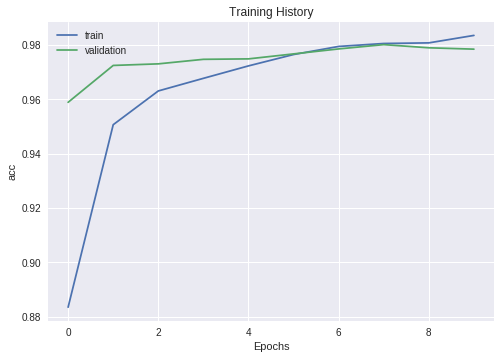

In [54]:
show_train_history(train_history, 'acc', 'val_acc')